In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d 

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
data = np.loadtxt('/data/ex1data1.txt', delimiter=',')


In [5]:
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]


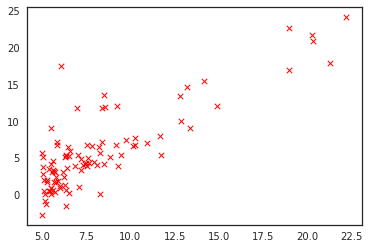

In [11]:
plt.scatter(X[:,1], y,c='red',s=30,linewidth=1,marker='x')
plt.show()

In [12]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [14]:
computeCost(X,y)

32.072733877455676

In [15]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

In [18]:
theta , Cost_J = gradientDescent(X, y)
print(theta[0],theta[1])

[-3.63029144] [ 1.16636235]


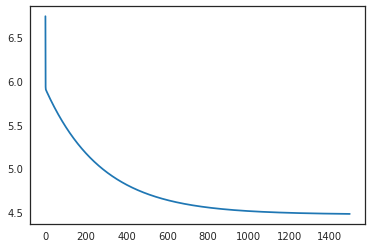

In [19]:
plt.plot(Cost_J)
plt.xlabel='iterations'
plt.ylabel='cost'
plt.show()

In [31]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx
np.c_[xx,yy]

array([[  5.        ,   2.20152031],
       [  6.        ,   3.36788266],
       [  7.        ,   4.53424501],
       [  8.        ,   5.70060736],
       [  9.        ,   6.86696971],
       [ 10.        ,   8.03333206],
       [ 11.        ,   9.19969441],
       [ 12.        ,  10.36605676],
       [ 13.        ,  11.53241911],
       [ 14.        ,  12.69878147],
       [ 15.        ,  13.86514382],
       [ 16.        ,  15.03150617],
       [ 17.        ,  16.19786852],
       [ 18.        ,  17.36423087],
       [ 19.        ,  18.53059322],
       [ 20.        ,  19.69695557],
       [ 21.        ,  20.86331792],
       [ 22.        ,  22.02968027]])

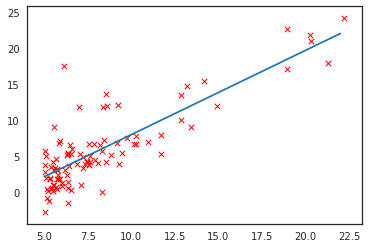

In [33]:
plt.plot(xx,yy)
plt.scatter(X[:,1], y,c='red',s=30,linewidth=1,marker='x')

plt.show()

In [54]:
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
y_predict=regr.predict(X[:,1].reshape(-1,1))

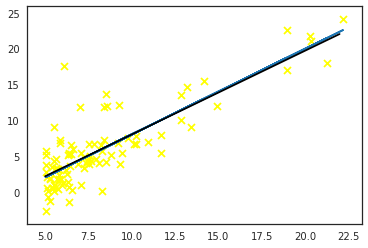

In [103]:
plt.plot(X[:,1],y_predict)
plt.plot(xx,yy,c='black')
plt.scatter(X[:,1],y,c='yellow',marker='x')
plt.show()

In [89]:
def error(y1,y2):
    l=y1.size
    e=0
    for i in range(l):
        #print(y1[i],y2[i])
        e=e+(y1[i]-y2[i])*(y1[i]-y2[i])
        
    return e

In [95]:
e=error(y.ravel(),y_predict)
import math
print(math.sqrt(e)/y.ravel().size)

0.30382344900358926


In [104]:
from sklearn.metrics import r2_score
r2_score(y.ravel(),y_predict)

0.70203155378413973